# WordNet

 * [¿Qué es WordNet?](Qué-es-WordNet)
 * [Synsets](#Synsets)
    * [Categoría gramatical de un synset](#Categoría-gramatical-de-un-synset)
    * [Lo que nos gusta de los synsets](#Lo-que-nos-gusta-de-los-synsets)
    * [Lemma](#Lemma)
 * [Relaciones](#Relaciones)
    * [Synset y las relaciones semánticas](#Synset-y-las-relaciones-semánticas)
       * [Hiperónimos](#Hiperónimos)
       * [Hipónimos](#Hipónimos)
       * [Holónimos](#Holónimos)
       * [Merónimos](#Merónimos)
    * [Lemma y sus relaciones](#Lemma-y-sus-relaciones)
       * [Formas derivadas](#Formas-derivadas)
       * [Antónimos](#Antónimos)
 * [Aplicaciones](#Aplicaciones)
    * [Expansión de búsquedas](#Expansión-de-búsquedas)
    * [Distancia semántica](#Distancia-semántica)
    * [Especificidad y concreción](#Especificidad-y-concreción)
 * [Referencias](#Referencias)
 
Puedes encontrar la última versión de este *workbook* en la cuenta de [Lingẅars](http://lingwars.github.io/blog/) de Github: [https://github.com/Lingwars/notebooks](https://github.com/Lingwars/notebooks/blob/master/Taller%20NLTK%20-%202017/WordNet.ipynb)

In [5]:
from nltk.corpus import wordnet  # This is NLTK's WordNet

# Import some helpful classes and functions
from IPython.display import HTML, display, Image

# This is a function to display a table in HTML format
def display_table(data, headers=None, caption=None):
    html = ["<table align=\"left\">"]
    
    if caption:
        html += ["<caption>{}</caption>".format(caption)]
        
    if headers:
        html += ["<tr>"] + ["<th>{}</th>".format(h) for h in headers] + ["</tr>"]
    
    for row in data:
        html += ["<tr>"]
        html += ["<td>{}</td>".format(it) for it in row]
        html += ["</tr>"]

    html.append("</table>")
    display(HTML(''.join(html)))    
    

## Qué es WordNet

[WordNet](https://wordnet.princeton.edu/) es una red de conceptos que contiene información codificada manualmente sobre sustantivos, verbos, adjetivos y adverbios en inglés; los términos que representan un mismo concepto están agrupados en *synsets* y son estos elementos los que constituyen los nodos de la red.

WordNet se creó en el Laboratorio de Ciencia Cognitiva de la Universidad de Princeton en 1985 bajo la dirección del profesor de psicología George Armitage Miller (1920-2012).

Para que nos hagamos una idea de la cantidad de información que contiene ([más números](http://wordnet.princeton.edu/wordnet/man/wnstats.7WN.html)):

In [34]:
n_nouns = len(list(wordnet.all_synsets(pos=wordnet.NOUN)))
n_verbs = len(list(wordnet.all_synsets(pos=wordnet.VERB)))
n_adj = len(list(wordnet.all_synsets(pos=wordnet.ADJ)))
n_adv = len(list(wordnet.all_synsets(pos=wordnet.ADV)))

print("What is inside WordNet?")
print("There are {} nouns.".format(n_nouns))
print("There are {} verbs.".format(n_verbs))
print("There are {} adjectives.".format(n_adj))
print("There are {} adverbs.".format(n_adv))

What is inside WordNet?
There are 82115 nouns.
There are 13767 verbs.
There are 18156 adjectives.
There are 3621 adverbs.


## Synsets

Un synset es un conjunto de palabras de la misma categoría gramatical que hacen referencia a la misma realidad extralingüística y por lo tanto pueden ser intercambiadas en un texto sin afectar al significado. Son elementos semánticamente equivalentes. Así, ocurrirá que las palabras polisémicas aparecerán múltiples veces en *synsets* diferentes.

Podemos hacer una búsqueda de uno de estos *synsets* utilizando la función `synsets`:

In [35]:
my_synsets = wordnet.synsets('dog')
print("There are {} synsets referring to this word:".format(len(my_synsets)))

data = []
for synset in my_synsets:
    data.append([synset.name(), synset.definition()])

display_table(data, ["Synset", "Definition"])


There are 8 synsets referring to this word:


Synset,Definition
dog.n.01,a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
frump.n.01,a dull unattractive unpleasant girl or woman
dog.n.03,informal term for a man
cad.n.01,someone who is morally reprehensible
frank.n.02,a smooth-textured sausage of minced beef or pork usually smoked; often served on a bread roll
pawl.n.01,a hinged catch that fits into a notch of a ratchet to move a wheel forward or prevent it from moving backward
andiron.n.01,metal supports for logs in a fireplace
chase.v.01,go after with the intent to catch


Podemos quedarnos con uno de ellos y explorar la cantidad de información que ofrece WordNet una vez que hemos encontrado el *synset* que nos interesa:

In [36]:
my_synset = my_synsets[0]  # TODO: Prueba con otros: my_synsets[1], my_synsets[2],...
print("synset.name: {}".format(my_synset.name()))
print("synset.definition: {}".format(my_synset.definition()))

print("synset.examples:")
for example in my_synset.examples():
    print("\t + {}".format(example))

print("synset.lemmas:")
for lemma in my_synset.lemmas():
    print("\t + {}".format(lemma.name()))


synset.name: dog.n.01
synset.definition: a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
synset.examples:
	 + the dog barked all night
synset.lemmas:
	 + dog
	 + domestic_dog
	 + Canis_familiaris


y también podemos buscar los lemmas correspondientes a un *synset* en otros idiomas. Vamos a mostrar aquí sólo un ejemplo porque trataremos este tema más adelante. Véamos cuáles son los relacionados con el *synset* que hemos guardado en la variable `my_synset` de la celda anterior:

In [37]:
languages = sorted(wordnet.langs())
print("These are the languages available: {}".format(', '.join(languages)))

selected_languages = ['eng', 'spa', 'fra', 'eus', 'jpn',] # TODO: Prueba con otros idiomas (de la lista)

data = []
for lang in selected_languages:
    data.append([lang, '</br>'.join(my_synset.lemma_names(lang))])

display_table(data, headers=["lang", "lemmas"])

These are the languages available: als, arb, bul, cat, cmn, dan, ell, eng, eus, fas, fin, fra, glg, heb, hrv, ind, ita, jpn, nno, nob, pol, por, qcn, slv, spa, swe, tha, zsm


lang,lemmas
eng,dogdomestic_dogCanis_familiaris
spa,canperro
fra,canis_familiarischien
eus,ortxakurzakur
jpn,イヌドッグ洋犬犬飼犬飼い犬


### Categoría gramatical de un synset

En el apartado anterior hemos recuperado todos los *synsets* a partir de una palabra y nos han aparecido significados correspondientes a sustantivos, verbos, adjetivos,... pero se puede afinar un poco más la búsqueda utilizando el *part of speech (pos)*:

 * `wordnet.VERB`
 * `wordnet.NOUN`
 * `wordnet.ADJ`
 * `wordnet.ADV`
 
¡Vamos a verlo en acción!

In [5]:
word = "bien"  # TODO: seguro que se te ocurren palabras que puedan aparecer en varias categorías gramaticales
lang = "spa"  # TODO: estamos buscando en español, pero...

synsets_as_noun = wordnet.synsets(word, lang=lang, pos=wordnet.NOUN)
synsets_as_verb = wordnet.synsets(word, lang=lang, pos=wordnet.VERB)
synsets_as_adj = wordnet.synsets(word, lang=lang, pos=wordnet.ADJ)
synsets_as_adv = wordnet.synsets(word, lang=lang, pos=wordnet.ADV)

# Vamos a imprimir los resultados
print("synsets_as_noun: {}".format(synsets_as_noun))

# TODO: ¿Te atreves a mostrar más información sobre ellos con una tabla?:
# def synset_table(synsets, title):
#    data = []
#    for synset in synsets:
#        data.append([synset.name(), synset.lemma_names(), synset.definition()])
#        
#    display_table(data, ["Synset", "Lemmas", "Definition"], caption=title)
#
#synset_table(synsets_as_noun, title="Resultados con: wordnet.NOUN")
#synset_table(synsets_as_verb, title="Resultados con: wordnet.VERB")
#synset_table(synsets_as_adj,  title="Resultados con: wordnet.ADJ")
#synset_table(synsets_as_adv, title="Resultados con: wordnet.ADV")


synsets_as_noun: [Synset('commodity.n.01'), Synset('good.n.03'), Synset('sake.n.01'), Synset('good.n.01'), Synset('personal_property.n.01')]


### Lo que nos gusta de los *synsets*

Lo que nos gusta de los *synsets* es que permiten referirse a un significado sin ambigüedades. A los ordenadores se les da muy mal resolver ambigüedades, generalmente se les da muy mal todo lo que humanos hacemos con relativa facilidad (entender un mensaje, reconocer imágenes,...), pero realizan muy eficazmente tareas que a nosotros nos cuestan mucho tiempo (búsquedas, ordenación,...).

Los ordenadores querrían ver los textos de esta forma, **sin ambigüedades**:

```
El perro ladra ---> El dog.n.01 bark.v.04
```
así podrían entenderlo y podríamos hacer inferencias sin equivocarnos.

### Lemma

No debe confundirse un **synset** con un **lemma**, tal y como los identifica WordNet. Recordemos que:
 
 * un **synset** está asociado a un significado, que puede representarse en lenguaje natural mediante palabras (lemmas) muy diferentes: perro, dog, can,...
 * un **lemma** es una palabra de lenguaje natural y, por lo tanto, puede tener varios significados (synsets).
 
Esta diferencia es importantísima tenerla presente.

In [6]:
ex_synset = wordnet.synset('dog.n.01')
for lemma in ex_synset.lemmas():
    print("{} -> {}".format(ex_synset, lemma))

Synset('dog.n.01') -> Lemma('dog.n.01.dog')
Synset('dog.n.01') -> Lemma('dog.n.01.domestic_dog')
Synset('dog.n.01') -> Lemma('dog.n.01.Canis_familiaris')


Como vemos, a traves de un *synset* llegamos a lemmas diferentes, pero todos ellos con el mismo significado. De hecho, el identificador del sysnset `dog.n.01` se mantiene.

In [7]:
ex_lemmas = wordnet.lemmas("dog")
for lemma in ex_lemmas:
    print("{} -> {} -> {}".format(lemma.name(), lemma, lemma.synset()))

dog -> Lemma('dog.n.01.dog') -> Synset('dog.n.01')
dog -> Lemma('frump.n.01.dog') -> Synset('frump.n.01')
dog -> Lemma('dog.n.03.dog') -> Synset('dog.n.03')
dog -> Lemma('cad.n.01.dog') -> Synset('cad.n.01')
dog -> Lemma('frank.n.02.dog') -> Synset('frank.n.02')
dog -> Lemma('pawl.n.01.dog') -> Synset('pawl.n.01')
dog -> Lemma('andiron.n.01.dog') -> Synset('andiron.n.01')
dog -> Lemma('chase.v.01.dog') -> Synset('chase.v.01')


En cambio, cuando buscamos una palabra obtenemos varios lemmas, cada uno de ellos asociado a un synset diferente. Se puede observar cómo los identificadores de los synsets son diferentes: `dog.n.01`, `frump.n.01`,...

### ¿Qué tal vamos hasta aquí?

In [8]:
bien = "https://media.giphy.com/media/tqxGgrCnQGsHm/giphy.gif"
mal = "https://media.giphy.com/media/rn0rRhia7343u/giphy.gif"

# TODO: Selecciona la imagen que corresponda (sustituye la variable 'img' por una de las de arriba)
# display(HTML("<img src='{}' />".format(img)))

## Relaciones

Como decíamos al principio, WordNet es más que un diccionario o un traductor, se trata de una **red de conceptos** que nos permite buscar relaciones entre significados de una forma extremadamente fácil e interesante.

### Synset y las relaciones semánticas

Los elementos de tipo *synset* definen algunas relaciones que puedes explorar. A continuación te indicamos cuáles creemos que son las más interesantes (puedes consultar la lista completa [aquí](http://www.nltk.org/api/nltk.corpus.reader.html#nltk.corpus.reader.wordnet.Synset)):

 * hiperónimos
 * hipónimos
 * holónimos
 * merónimos

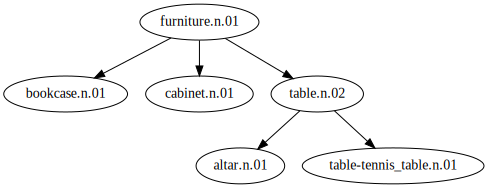

In [24]:
import graphviz  # pip install graphviz (es una librería para pintar grafos)

display(HTML("<strong>Relaciones de hiperonimia e hiponimia</strong>"))
d = graphviz.Digraph()
d.edge("furniture.n.01", "bookcase.n.01")
d.edge("furniture.n.01", "cabinet.n.01")
d.edge("furniture.n.01", "table.n.02")
d.edge("table.n.02", "altar.n.01")
d.edge("table.n.02", "table-tennis_table.n.01")
d

La hiperonimia e hiponimia codifican relaciones a nivel de significado. Un **hipónimo** concreta el significado de su **hiperónimo**, así mesa es más específico que mueble, como altar es un tipo particular de mesa.

[Synset('armrest.n.01'), Synset('doorlock.n.01'), Synset('hinge.n.01')]


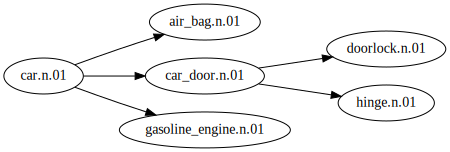

In [33]:
display(HTML("<strong>Relaciones de holonimia y meronimia</strong>"))

d = graphviz.Digraph()
d.graph_attr['rankdir'] = 'LR'
d.edge("car.n.01", "air_bag.n.01")
d.edge("car.n.01", "car_door.n.01")
d.edge("car.n.01", "gasoline_engine.n.01")
d.edge("car_door.n.01", "doorlock.n.01")
d.edge("car_door.n.01", "hinge.n.01")
d

Las relaciones de holonimia y meronimia codifican relaciones entre el todo y sus partes. Un puerta (de coche) es una parte del coche.

In [25]:
my_synset = wordnet.synset("hand.n.01")  # TODO: Cambia el valor almacenado en la variable 'my_synset' para 
                                         #   obtener otros resultados en las siguientes celdas

#### Hiperónimos

In [26]:
data = []
for hypernym in my_synset.hypernyms():
    lemmas = [lemma.name() for lemma in hypernym.lemmas()]
    data.append([hypernym, ', '.join(lemmas), '</br>'.join(hypernym.examples())])
display_table(data, ["hyp-synset", "lemmas", "examples"], caption="Hypernyms for {}".format(my_synset))

hyp-synset,lemmas,examples
Synset('extremity.n.05'),extremity,


Además de los hiperónimos a nivel de significado, también existen **a nivel de instancia `instance_hypernyms`** (igual con los hipónimos). Por ejemplo, si hemos encontrado en un texto una entidad (ver NER) como `Vargas Llosa`, gracias a WordNet podemos hacer lo siguiente:

In [11]:
q = "Zweig"  # TODO: Prueba otros como p.ej.: Vargas_Llosa, Zweig, Einstein

ner = wordnet.synsets(q)[0]  # Recoge el primer resultado
hiperonimos = ner.instance_hypernyms()[0]  # Busca sus hiperónimos y quédate con el primero

# Qué tengo?
print("Había buscado: {}".format(q))
print("{} is a {}".format(ner.name(), hiperonimos.name()))  # Su hiperónimo me dice su profesión!!
print("Otras formas de llamarlo son: {}".format(', '.join([it.name() for it in ner.lemmas()])))
print("Su 'definición' es: {}".format(ner.definition()))

Había buscado: Zweig
zweig.n.01 is a writer.n.01
Otras formas de llamarlo son: Zweig, Stefan_Zweig
Su 'definición' es: Austrian writer (1881-1942)


En estos casos, por ejemplo, el hiperónimo de un un escritor concreto es la categoría *escritor* puesto que generaliza su significado. 

#### Hipónimos

In [12]:
data = []
for hyponym in my_synset.hyponyms():
    lemmas = [lemma.name() for lemma in hyponym.lemmas()]
    data.append([hyponym, ', '.join(lemmas), '</br>'.join(hyponym.examples())])
display_table(data, ["hyponym-synset", "lemmas", "examples"], caption="Hyponyms for {}".format(my_synset))

hyponym-synset,lemmas,examples
Synset('fist.n.01'),"fist, clenched_fist",
Synset('hooks.n.01'),"hooks, meat_hooks, maulers",wait till I get my hooks on him
Synset('left.n.03'),"left, left_hand",jab with your left
Synset('right.n.05'),"right, right_hand",he writes with his right hand but pitches with his lefthit him with quick rights to the body


#### Holónimos

In [13]:
# member_holonyms, substance_holonyms, part_holonyms
data = []
for holonym in my_synset.part_holonyms():
    lemmas = [lemma.name() for lemma in holonym.lemmas()]
    data.append([holonym, ', '.join(lemmas), '</br>'.join(holonym.examples())])
display_table(data, ["holonym-synset", "lemmas", "examples"], caption="Holonyms for {}".format(my_synset))

holonym-synset,lemmas,examples
Synset('arm.n.01'),arm,
Synset('homo.n.02'),"homo, man, human_being, human",


#### Merónimos

In [14]:
# member_meronyms, substance_meronyms, part_meronyms
data = []
for meronym in my_synset.part_meronyms():
    lemmas = [lemma.name() for lemma in meronym.lemmas()]
    data.append([meronym, ', '.join(lemmas), '</br>'.join(meronym.examples())])
display_table(data, ["meronym-synset", "lemmas", "examples"], caption="Meronyms for {}".format(my_synset))

meronym-synset,lemmas,examples
Synset('ball.n.10'),ball,the ball at the base of the thumbhe stood on the balls of his feet
Synset('digital_arteries.n.01'),"digital_arteries, arteria_digitalis",
Synset('finger.n.01'),finger,her fingers were long and thin
Synset('intercapitular_vein.n.01'),"intercapitular_vein, vena_intercapitalis",
Synset('metacarpal_artery.n.01'),"metacarpal_artery, arteria_metacarpea",
Synset('metacarpal_vein.n.01'),"metacarpal_vein, vena_metacarpus",
Synset('metacarpus.n.01'),metacarpus,
Synset('palm.n.01'),"palm, thenar",


### Lemma y sus relaciones

Los lemas, por su parte, también definen unas cuantas relaciones interesantes (lista completa [aquí](http://www.nltk.org/api/nltk.corpus.reader.html#nltk.corpus.reader.wordnet.Lemma)), si bien, las dos que nos parecen más interesantes son:

 * antonyms
 * derivationally_related_forms

In [15]:
my_lemma = wordnet.lemma("fast.a.01.fast")

#### Formas derivadas

In [16]:
lang='spa'  # TODO: Change the language
data = []
for item in my_lemma.derivationally_related_forms():
    lemmas = item.synset().lemma_names(lang=lang)
    data.append([item, '</br>'.join(lemmas), '</br>'.join(item.synset().examples())])
display_table(data, ["derivationally-related-forms", "lemmas", "examples"], caption="Derivates for {}".format(my_lemma))

derivationally-related-forms,lemmas,examples
Lemma('speed.n.02.fastness'),rapidezvelocidad,the project advanced with gratifying speed


#### Antónimos

In [17]:
lang='eng'  # TODO: Change the language
data = []
for item in my_lemma.antonyms():
    lemmas = item.synset().lemma_names(lang=lang)
    data.append([item, '</br>'.join(lemmas), '</br>'.join(item.synset().examples())])
display_table(data, ["antonym-lemma", "lemmas", "examples"], caption="Antonym for {}".format(my_lemma))

antonym-lemma,lemmas,examples
Lemma('slow.a.01.slow'),slow,a slow walkerthe slow lane of trafficher steps were slowhe was slow in reacting to the newsslow but steady growth


## Aplicaciones

Las relaciones entre un elemento y sus vecinos permiten explorar la red de conceptos buscando términos relacionados con una palabra (lema) dada o bien con un concepto (synset) determinado. Sin embargo, esta estructura de relaciones nos permite también abordar problemas mucho más ambiciosos. Algunos de ellos los vemos a continuación:

### Expansión de búsquedas

Una de las primeras aplicaciones que se nos pueden ocurrir y quizá de las más utilizadas es la expansión de búsquedas. Para ello podemos utilizar estas redes de conceptos para ampliar la búsqueda utilizando otras palabras relacionadas. De este modo lo que se persigue es encontrar documentos que, aunque no contengan exactamente la misma palabra que se ha introducido, sí sean relevantes por contener otras relacionadas.

Por ejemplo, si el usuario ha introducido `dalmatian` como término de búsqueda, podemos hacer lo siguiente:

In [18]:
q = "dalmatian"
print("Original query: {}".format(q))

# Look synsets related to the keyword
synsets = wordnet.synsets(q)

# Expand the query to all related synsets
def gather_lemmas(synset_list):
    lemmas = []
    for synset in synset_list:
        lemmas += synset.lemma_names()
    return lemmas
    
expanded_query = [q] + gather_lemmas(synsets)
print("Expanded to synsets: {}".format(', '.join(set(expanded_query))))

# Expand the query to all hyperonyms:
for synset in synsets:
    expanded_query += gather_lemmas(synset.hypernyms())

print("Expanded with hyperonyms: {}".format(', '.join(set(expanded_query))))


Original query: dalmatian
Expanded to synsets: carriage_dog, coach_dog, Dalmatian, dalmatian
Expanded with hyperonyms: European, coach_dog, Dalmatian, dog, Canis_familiaris, carriage_dog, domestic_dog, dalmatian


Al tener muchos más términos de búsqueda podremos recuperar muchos más documentos de nuestro corpus en caso de que la búsqueda original ofreciera un numero insuficiente de resultados.

### Distancia semántica

Otra aplicación muy habitual cuando se dispone de una red de conceptos es medir la distancia semántica entre significados. Algunas situaciones en las que puede plantearse esta necesidad son la evaluación de traductores (cuál se ha separado menos del significado original) o la desambiguación (ante un mismo lema con varios significados podemos asignarle una probabilidad a cada uno de ellos según la distancia a la temática del documento).

Esta aplicación es tan demandada que NLTK implementa los principales algoritmos para calcular esta medida. Por ejemplo, dados tres significados `dog.n.01`, `cat.n.01` y `tiger.n.01`, veamos cuál es la distancia entre ellos:

In [19]:
synset1 = wordnet.synset("dog.n.01")
synset2 = wordnet.synset("cat.n.01")
sim = wordnet.path_similarity(synset1, synset2)

print("The similarity between {} and {} using the given algorithm is {:0.4f}".format(synset1, synset2, sim))

The similarity between Synset('dog.n.01') and Synset('cat.n.01') using the given algorithm is 0.2000


Vamos a definir ahora una lista en las que incorporaremos todas las funciones que ofrece WordNet para el cálculo de la similaridad entre dos *synsets*:

In [20]:
# Métodos básicos para calcular similitud entre dos términos
methods = [('path_similarity', wordnet.path_similarity),
           ('Leacock-Chodorow', wordnet.lch_similarity),
           ('Wu-Palmer', wordnet.wup_similarity),]

# Algunos algoritmos necesitan un 'corpus' para utilizarlo como referencia
from nltk.corpus import wordnet_ic, genesis
brown_ic = wordnet_ic.ic('ic-brown.dat')
semcor_ic = wordnet_ic.ic('ic-semcor.dat')
genesis_ic = wordnet.ic(genesis, False, 0.0) # Esto puede tardar un poco la primera vez

methods_ic = [('Resnik + Brown', lambda u,v: wordnet.res_similarity(u, v, brown_ic)),
              ('Resnik + Semcor', lambda u,v: wordnet.res_similarity(u, v, semcor_ic)),
              ('Resnik + Genesis', lambda u,v: wordnet.res_similarity(u, v, genesis_ic)),
                
              ('Jiang-Conrath + Brown', lambda u,v: wordnet.jcn_similarity(u, v, brown_ic)),
              ('Jiang-Conrath + Semcor', lambda u,v: wordnet.jcn_similarity(u, v, semcor_ic)),
              ('Jiang-Conrath + Genesis', lambda u,v: wordnet.jcn_similarity(u, v, genesis_ic)),
           
              ('Lin + Brown', lambda u,v: wordnet.lin_similarity(u, v, brown_ic)),
              ('Lin + Semcor', lambda u,v: wordnet.lin_similarity(u, v, semcor_ic)),
              ('Lin + Genesis', lambda u,v: wordnet.lin_similarity(u, v, genesis_ic)),]

Y también una función para mostrar los resultados de nuestros cálculos en una tabla.

In [21]:
float_format = "{0:.4f}"

def compute_distances(item_list, method_list):
    data = []
    it1 = item_list[0]
    for key,method in method_list:
        max_similarity = method(it1, it1)
        row = [float_format.format(1.0),]

        for it2 in item_list[1:]:
            similitud = method(it1, it2)/max_similarity  # Normalized by 'similarity(it1, it1)'
            row.append(float_format.format(similitud)) 
        data.append([key] + row)

    columns = ["{} > {}".format(item_list[0].name(), it.name()) for it in item_list]
    display_table(data, ["Method"] + columns, caption="Similitud normalizada entre '{}'".format(it1))

Con los elementos anteriores, la lista de algoritmos y la función auxiliar, podemos empezar a calcular cosas:

In [22]:
dog = wordnet.synset("dog.n.01")
cat = wordnet.synset("cat.n.01")
tiger = wordnet.synset("tiger.n.01")
animals = [dog, cat, tiger] # TODO: Aquí puedes añadir más synsets

compute_distances(animals, methods + methods_ic)

Method,dog.n.01 > dog.n.01,dog.n.01 > cat.n.01,dog.n.01 > tiger.n.01
path_similarity,1.0000,0.2000,0.1667
Leacock-Chodorow,1.0000,0.5576,0.5074
Wu-Palmer,1.0000,0.9231,0.7602
Resnik + Brown,1.0000,0.8785,0.2470
Resnik + Semcor,1.0000,0.9373,0.2355
Resnik + Genesis,1.0000,0.7236,0.1445
Jiang-Conrath + Brown,1.0000,0.0000,0.0000
Jiang-Conrath + Semcor,1.0000,0.0000,0.0000
Jiang-Conrath + Genesis,1.0000,0.0000,0.0000
Lin + Brown,1.0000,0.8768,0.2091


In [23]:
p1 = wordnet.synset("Einstein.n.01")
p2 = wordnet.synset("Austen.n.01")
p3 = wordnet.synset("Zweig.n.01")
p4 = wordnet.synset("Cousteau.n.01")
p5 = wordnet.synset("akhenaton.n.01")
people = [p1, p2, p3, p4, p5] # TODO: Aquí puedes añadir más synsets

for it in people:
    hyp = it.instance_hypernyms()[0]
    print("{} is a {}".format(it.lemmas()[0].name(), hyp.lemmas()[0].name()))

compute_distances([p1, p2, p3, p4, p5], methods)
compute_distances([p3, p1, p2, p4, p5], methods)

Einstein is a physicist
Austen is a writer
Zweig is a writer
Cousteau is a explorer
Akhenaton is a king


Method,einstein.n.01 > einstein.n.01,einstein.n.01 > austen.n.01,einstein.n.01 > zweig.n.01,einstein.n.01 > cousteau.n.01,einstein.n.01 > akhenaton.n.01
path_similarity,1.0000,0.1429,0.1429,0.1667,0.1250
Leacock-Chodorow,1.0000,0.4651,0.4651,0.5074,0.4283
Wu-Palmer,1.0000,0.6000,0.6000,0.6316,0.5714


Method,zweig.n.01 > zweig.n.01,zweig.n.01 > einstein.n.01,zweig.n.01 > austen.n.01,zweig.n.01 > cousteau.n.01,zweig.n.01 > akhenaton.n.01
path_similarity,1.0000,0.1429,0.3333,0.1667,0.1250
Leacock-Chodorow,1.0000,0.4651,0.6980,0.5074,0.4283
Wu-Palmer,1.0000,0.6000,0.6000,0.6316,0.5714


### Desambiguación

El problema clásico y ¿sin solución definitiva? del Procesamiento de Lenguaje Natural: desambiguar el significado de una palabra. Una forma de abordarlo que se me ocurre con lo que sabemos hasta ahora:

In [24]:
sentence = "El banco presta dinero a cambio de un interés"

Sabemos tokenizar y realizar el análisis sintáctico de una oración. Con ello obtendremos las palabras individuales y el *part of speech* de cada una de ellas

In [25]:
sentence = [("bank", "n"), ("lend", "v"), ("money", "n"), ("interest", "n")]

# Remove everything but nouns (WordNet does not retrieve similarity for different part of speech synsets)
sentence = [(it, pos) for it, pos in sentence if pos=="n"]

Obviamente tenemos un problema de desambiguación puesto que cada una de estas palabras puede tener diferentes significados. Vamos a listarlos todos:

In [26]:
for word, pos in sentence:
    display(HTML("<strong>Significados de {}:</strong>".format(word)))

    synsets = wordnet.synsets(word, pos=pos)
    data = []
    for s in synsets:
        data.append([s, ', '.join([it.name() for it in s.lemmas()]), s.definition()])
        
    display_table(data)
    

Synset('bank.n.01'),bank,sloping land (especially the slope beside a body of water)
Synset('depository_financial_institution.n.01'),"depository_financial_institution, bank, banking_concern, banking_company",a financial institution that accepts deposits and channels the money into lending activities
Synset('bank.n.03'),bank,a long ridge or pile
Synset('bank.n.04'),bank,an arrangement of similar objects in a row or in tiers
Synset('bank.n.05'),bank,a supply or stock held in reserve for future use (especially in emergencies)
Synset('bank.n.06'),bank,the funds held by a gambling house or the dealer in some gambling games
Synset('bank.n.07'),"bank, cant, camber",a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
Synset('savings_bank.n.02'),"savings_bank, coin_bank, money_box, bank",a container (usually with a slot in the top) for keeping money at home
Synset('bank.n.09'),"bank, bank_building",a building in which the business of banking transacted
Synset('bank.n.10'),bank,a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)


Synset('money.n.01'),money,the most common medium of exchange; functions as legal tender
Synset('money.n.02'),money,wealth reckoned in terms of money
Synset('money.n.03'),money,the official currency issued by a government or national bank


Synset('interest.n.01'),"interest, involvement",a sense of concern with and curiosity about someone or something
Synset('sake.n.01'),"sake, interest",a reason for wanting something done
Synset('interest.n.03'),"interest, interestingness",the power of attracting or holding one's attention (because it is unusual or exciting etc.)
Synset('interest.n.04'),interest,a fixed charge for borrowing money; usually a percentage of the amount borrowed
Synset('interest.n.05'),"interest, stake",(law) a right or legal share of something; a financial involvement with something
Synset('interest.n.06'),"interest, interest_group",(usually plural) a social group whose members control some field of activity and who have common aims
Synset('pastime.n.01'),"pastime, interest, pursuit",a diversion that occupies one's time and thoughts (usually pleasantly)


La estrategia que vamos a seguir es probar todas las combinaciones posibles y quedarnos con aquélla que ofrezca la mayor similitud entre sus componentes. ¿Aproximación válida? ¿Inválida? ¿Muy costosa computacionalmente?

In [27]:
sentence_options = [wordnet.synsets(word, pos=pos) for word, pos in sentence]

import itertools
all_combinations = list(itertools.product(*sentence_options))
display(HTML("There are {} possible combinations!!".format(len(all_combinations))))

data = {}
for comb in all_combinations:
    sim = 0
    for pair in itertools.combinations(comb, r=2):
        if pair[0].pos() == pair[1].pos():  # WordNet does not return similarity between different part-of-speech
            sim += wordnet.path_similarity(pair[0], pair[1])
    data[comb] = sim

import operator
sorted_data = sorted(data.items(), key=operator.itemgetter(1), reverse=True)

# Keep just the first 10
display(HTML("Top 10 are:"))
top10 = sorted_data[:10]

# Vamos a imprimir los lemmas, aunque un ordenador lo que querría son los synsets.
data_to_display = []
for it, sim in top10:
    row = ["{:0.4f}".format(sim)]
    for synset in it:
        cell_text = "{}: {}".format(synset.name(), ', '.join([lema.name() for lema in synset.lemmas()]))
        row.append(cell_text)
    data_to_display.append(row)

display_table(data_to_display, headers=["score"] + [word for word, pos in sentence])

# And the winner is
winner, sim = top10[0]
display(HTML("<strong>And the winner is</strong>, with a score of {}:<ul>".format(sim)))
for it in winner:
    display(HTML("<li><strong>{}</strong>: {}</li>".format(it.name(), it.definition())))
display(HTML("</ul>"))

score,bank,money,interest
0.4857,bank.n.06: bank,money.n.02: money,"interest.n.05: interest, stake"
0.3818,bank.n.06: bank,money.n.01: money,"interest.n.05: interest, stake"
0.3778,bank.n.04: bank,money.n.02: money,"interest.n.06: interest, interest_group"
0.3778,bank.n.04: bank,money.n.01: money,"interest.n.06: interest, interest_group"
0.3667,bank.n.06: bank,money.n.03: money,"interest.n.05: interest, stake"
0.3651,bank.n.06: bank,money.n.02: money,"interest.n.06: interest, interest_group"
0.3611,"depository_financial_institution.n.01: depository_financial_institution, bank, banking_concern, banking_company",money.n.01: money,"interest.n.06: interest, interest_group"
0.3611,"depository_financial_institution.n.01: depository_financial_institution, bank, banking_concern, banking_company",money.n.02: money,"interest.n.06: interest, interest_group"
0.3576,bank.n.04: bank,money.n.03: money,"interest.n.06: interest, interest_group"
0.3436,"depository_financial_institution.n.01: depository_financial_institution, bank, banking_concern, banking_company",money.n.03: money,"interest.n.06: interest, interest_group"


¿Cómo podemos mejorar este resultado de manera fácil? Si tenemos información sobre el contexto, por ejemplo, si sabemos que es una noticia de la sección económica de un periódico, entonces podemos utilizar como input la frecuencia relativa de nuestros significados dentro de ese corpus.

### Especificidad y concreción

¡Toma epígrage! Hay un método que te devuelve la profundidad en la jerarquía de conceptos de una palabra, ¿se podría evaluar en base a esto cómo de riguroso es un autor?

En primer lugar, ten en cuenta que WordNet no es una estructura en forma de árbol, sino que es un grafo, es decir, ¡puede haber varios caminos para llegar a un mismo nodo!

In [39]:
dog = wordnet.synset('dog.n.01')

for path in dog.hypernym_paths():
    print("== Path:")
    print(' >> '.join([item.name() for item in path]))

== Path:
entity.n.01 >> physical_entity.n.01 >> object.n.01 >> whole.n.02 >> living_thing.n.01 >> organism.n.01 >> animal.n.01 >> chordate.n.01 >> vertebrate.n.01 >> mammal.n.01 >> placental.n.01 >> carnivore.n.01 >> canine.n.02 >> dog.n.01
== Path:
entity.n.01 >> physical_entity.n.01 >> object.n.01 >> whole.n.02 >> living_thing.n.01 >> organism.n.01 >> animal.n.01 >> domestic_animal.n.01 >> dog.n.01


TypeError: 'str' object is not callable

Esto es importante porque al calcular la profundidad de un nodo en la jerarquía de conceptos obtendremos varios valores:

In [29]:
words = {'dog': 'dog.n.01',
          'dalmatian': 'dalmatian.n.01',
          'animal': 'animal.n.01'}

data = []
for w,s in words.items():
    min_depth = wordnet.synset(s).min_depth()
    max_depth = wordnet.synset(s).max_depth()
    data.append([w, min_depth, max_depth])
    
display_table(data, ["synset", "min_depth", "max_depth"])

synset,min_depth,max_depth
animal,6,6
dalmatian,6,9
dog,8,13


es decir que si queremos comparar la profundidad relativa entre dos conceptos tenemos que procurar evaluar ambos **utilizando el mismo camino** para no obtener resultados indeseados.

## Referencias



 * [Global Wordnet Association](http://globalwordnet.org/): muy interesante la colección de links a *wordnets* en otros idiomas ;D
 * [Universal Networking Language](https://en.wikipedia.org/wiki/Universal_Networking_Language): otra iniciativa de codificación unívoca del lenguaje. Uno de los grupos de desarrollo está en la UPM-Informática.

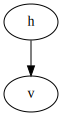